# **Author : Pujayant Kumar**

# **LGMVIP**

#**Task-2: Stock Market Prediction and Forecasting using  Stacked LSTM**

# Dataset:https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

# **Libraries**

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error

# Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

# **Reading the Dataset**

In [2]:
data_set = pd.read_csv('/content/NSE-TATAGLOBAL.csv')
data_set

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


# **Exploring Data and Making required changes for better understanding**

In [3]:
data_set.isnull().sum()
# No null values so we can proceed

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [4]:
data_set['Date'] = pd.to_datetime(data_set['Date'])

In [5]:
df = data_set.sort_values('Date')
df.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [6]:
df.reset_index(inplace=True)

# **Visualizing the Data**

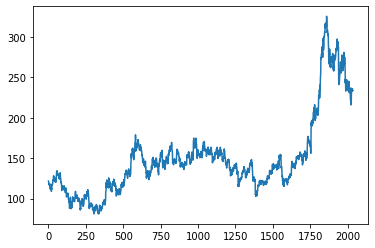

In [7]:
plt.plot(df['Close'])

In [8]:
df_close = df['Close']
df_close

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

# **Feature Scaling**

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))

In [10]:
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))
df_close

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

# **Splitting the data into training and test sets**

In [11]:
training_size = int(len(df_close)*0.70)
test_size = len(df_close) - training_size
train, test = df_close[0: training_size,:], df_close[training_size : len(df_close),:1]

In [12]:
# Let us convert the array values previously calculated into a matrix
def create_mat(ds, time_step = 1):
    dataX, dataY = [],[]
    for i in range(len(ds)-time_step-1):
        a = ds[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(ds[i + time_step, 0])
    return np.array(dataX), np.array(dataY)  

In [13]:
time_step = 100
X_train, y_train = create_mat(train, time_step)
X_test, y_test = create_mat(test, time_step)

In [14]:
X_train.shape

(1323, 100)

In [15]:
y_train.shape

(1323,)

In [16]:
X_test.shape

(510, 100)

In [17]:
y_test.shape

(510,)

In [18]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# **Building the Model**

In [20]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(X_train, y_train, validation_split=0.1, epochs=60, batch_size=64, verbose = 1)

Epoch 1/60
19/19 [==============================] - 19s 298ms/step - loss: 0.0090 - val_loss: 0.0028
Epoch 2/60
19/19 [==============================] - 3s 178ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 3/60
19/19 [==============================] - 3s 177ms/step - loss: 9.4346e-04 - val_loss: 0.0012
Epoch 4/60
19/19 [==============================] - 3s 177ms/step - loss: 8.3960e-04 - val_loss: 0.0011
Epoch 5/60
19/19 [==============================] - 3s 178ms/step - loss: 8.1421e-04 - val_loss: 0.0011
Epoch 6/60
19/19 [==============================] - 3s 175ms/step - loss: 8.3204e-04 - val_loss: 0.0011
Epoch 7/60
19/19 [==============================] - 3s 177ms/step - loss: 7.7093e-04 - val_loss: 9.9613e-04
Epoch 8/60
19/19 [==============================] - 3s 180ms/step - loss: 7.4329e-04 - val_loss: 9.3602e-04
Epoch 9/60
19/19 [==============================] - 3s 177ms/step - loss: 7.5183e-04 - val_loss: 9.6440e-04
Epoch 10/60
19/19 [==============================] - 3s 177

In [22]:
predictions = model.predict(X_test)

In [23]:
# performing inverse transform on predictions
inv_predictions = scaler.inverse_transform(predictions)

In [24]:
inv_predictions

array([[142.96567 ],
       [143.09985 ],
       [142.25821 ],
       [139.64851 ],
       [137.77875 ],
       [137.33385 ],
       [138.72545 ],
       [140.52065 ],
       [140.89502 ],
       [140.11057 ],
       [139.46222 ],
       [140.57422 ],
       [141.84518 ],
       [143.63922 ],
       [145.86247 ],
       [144.09497 ],
       [141.10666 ],
       [140.33147 ],
       [141.41127 ],
       [146.7371  ],
       [151.7591  ],
       [153.79875 ],
       [153.2668  ],
       [150.61523 ],
       [150.26636 ],
       [150.98228 ],
       [152.11426 ],
       [153.82047 ],
       [154.31688 ],
       [153.7803  ],
       [153.72208 ],
       [152.73952 ],
       [149.70975 ],
       [144.04582 ],
       [140.28159 ],
       [139.55771 ],
       [140.22868 ],
       [139.56242 ],
       [136.76422 ],
       [132.48141 ],
       [129.57722 ],
       [128.64417 ],
       [127.25419 ],
       [126.506714],
       [124.55472 ],
       [121.774216],
       [120.6642  ],
       [120.4

# ***Performance Metrics***

# **Mean Square error**

In [27]:
mse = math.sqrt(mean_squared_error(y_test, predictions))
print("The Mean Squared Error for above model is:", mse)

The Mean Squared Error for above model is: 0.03740481411180164


# **Thank You**